### Pre Data Processing EDA

In [37]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql.functions import col, count, when


# Initialize SparkContext
sc = SparkContext.getOrCreate()

In [38]:
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("EDA") \
    .getOrCreate()

# Read the JSON files
spark.read.option("multiline", "true").json("yelp_academic_dataset_business.json")
business = spark.read.json("yelp_academic_dataset_business.json")
review = spark.read.json("yelp_academic_dataset_review.json")
tip = spark.read.json("yelp_academic_dataset_tip.json")
checkin = spark.read.json("yelp_academic_dataset_checkin.json")

In [39]:
# Reading schema of all jsons
#For business
print("Schema of Business:")
business.printSchema()
print("First few rows of Business:")
business.show(5)
print(business.count())

Schema of Business:
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |--

In [40]:
#statistical summary for business 
business.describe().show()

+-------+-----------------+--------------------+--------------------+-----------+------------------+-----------------+------------------+--------------------+------------------+------------------+------------------+------+
|summary|          address|         business_id|          categories|       city|           is_open|         latitude|         longitude|                name|       postal_code|      review_count|             stars| state|
+-------+-----------------+--------------------+--------------------+-----------+------------------+-----------------+------------------+--------------------+------------------+------------------+------------------+------+
|  count|           150346|              150346|              150243|     150346|            150346|           150346|            150346|              150346|            150346|            150346|            150346|150346|
|   mean|7369.333333333333|                NULL|                NULL|       NULL|0.7961502135075094|36.67115

In [41]:
#Checking for missing values for buziness
business.select([count(when(col(c).isNull(), c)).alias(c) for c in business.columns]).show()

+-------+----------+-----------+----------+----+-----+-------+--------+---------+----+-----------+------------+-----+-----+
|address|attributes|business_id|categories|city|hours|is_open|latitude|longitude|name|postal_code|review_count|stars|state|
+-------+----------+-----------+----------+----+-----+-------+--------+---------+----+-----------+------------+-----+-----+
|      0|     13744|          0|       103|   0|23223|      0|       0|        0|   0|          0|           0|    0|    0|
+-------+----------+-----------+----------+----+-----+-------+--------+---------+----+-----------+------------+-----+-----+



In [42]:
#For Reviews

print("Schema of Review:")
review.printSchema()

print("First few rows of Review:")
review.show(5)
print(review.count())

#statistical summary for review 
review.describe().show()

Schema of Review:
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

First few rows of Review:
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a 

In [43]:
#Checking for missing values for reviews
review.select([count(when(col(c).isNull(), c)).alias(c) for c in review.columns]).show()

+-----------+----+----+-----+---------+-----+----+------+-------+
|business_id|cool|date|funny|review_id|stars|text|useful|user_id|
+-----------+----+----+-----+---------+-----+----+------+-------+
|          0|   0|   0|    0|        0|    0|   0|     0|      0|
+-----------+----+----+-----+---------+-----+----+------+-------+



In [44]:

#For tips 
print("Schema of tip:")
review.printSchema()

print("First few rows of tip:")
review.show(5)
print(tip.count())

#statistical summary for tip 
tip.describe().show()

Schema of tip:
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

First few rows of tip:
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ..

In [45]:
#Checking for missing values for tip
tip.select([count(when(col(c).isNull(), c)).alias(c) for c in tip.columns]).show()

+-----------+----------------+----+----+-------+
|business_id|compliment_count|date|text|user_id|
+-----------+----------------+----+----+-------+
|          0|               0|   0|   0|      0|
+-----------+----------------+----+----+-------+



In [46]:
#For checkin

print("Schema of checkin:")
review.printSchema()

print("First few rows of checkin:")
review.show(5)
print(checkin.count())

#statistical summary for tip 
checkin.describe().show()

Schema of checkin:
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

First few rows of checkin:
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken 

In [47]:
#Checking for missing values 
checkin.select([count(when(col(c).isNull(), c)).alias(c) for c in checkin.columns]).show()


+-----------+----+
|business_id|date|
+-----------+----+
|          0|   0|
+-----------+----+



In [48]:
!pip install matplotlib
!pip install seaborn


In [49]:

# Group by 'review_id' and count each ID
count_review_id = review.groupBy("review_id").agg(count("review_id").alias("num_occurrences"))

# Filter for IDs that occur more than once
duplicate_values = count_review_id.filter(col("num_occurrences") > 1)

# Count the number of duplicate review IDs
num_of_duplicates = duplicate_values.count()

print(f"number of duplicate review_id's: {num_of_duplicates}")



number of duplicate review_id's: 0


In [50]:
from pyspark.sql.functions import explode
from pyspark.sql.functions import split

df = business.withColumn("categories", split("categories", ", "))


df1 = df.withColumn("categories", explode("categories"))

category_counts = df1.groupBy("categories").count().orderBy("count", ascending=False)
category_counts.show()



+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|52268|
|                Food|27781|
|            Shopping|24395|
|       Home Services|14356|
|       Beauty & Spas|14292|
|           Nightlife|12281|
|    Health & Medical|11890|
|      Local Services|11198|
|                Bars|11065|
|          Automotive|10773|
|Event Planning & ...| 9895|
|          Sandwiches| 8366|
|American (Traditi...| 8139|
|         Active Life| 7687|
|               Pizza| 7093|
|        Coffee & Tea| 6703|
|           Fast Food| 6472|
|  Breakfast & Brunch| 6239|
|      American (New)| 6097|
|     Hotels & Travel| 5857|
+--------------------+-----+
only showing top 20 rows



In [51]:
# businesses that are marked as open ('is_open' is 1 )
open_businesses = business.filter(business.is_open == 1)

# Count the number of open businesses
num_open_businesses = open_businesses.count()

print(f"total number of open businesses: {num_open_businesses}")


total number of open businesses: 119698


In [52]:
# Convert 'categories' from a string to an array
open_businesses = open_businesses.withColumn("categories", split("categories", ", "))

open_businesses_exploded = open_businesses.withColumn("categories", explode("categories"))

# Count the number of open businesses per category
open_businesses_by_category = open_businesses_exploded.groupBy("categories").count().orderBy("count", ascending=False)
open_businesses_by_category.show()


+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|34987|
|                Food|20419|
|            Shopping|20186|
|       Home Services|13322|
|       Beauty & Spas|12263|
|    Health & Medical|11046|
|      Local Services|10138|
|          Automotive| 9879|
|           Nightlife| 8379|
|Event Planning & ...| 8173|
|                Bars| 7528|
|         Active Life| 6496|
|          Sandwiches| 6075|
|American (Traditi...| 5531|
|           Fast Food| 5516|
|     Hotels & Travel| 5123|
|               Pizza| 5090|
|       Home & Garden| 5022|
|         Auto Repair| 5003|
|        Coffee & Tea| 4954|
+--------------------+-----+
only showing top 20 rows



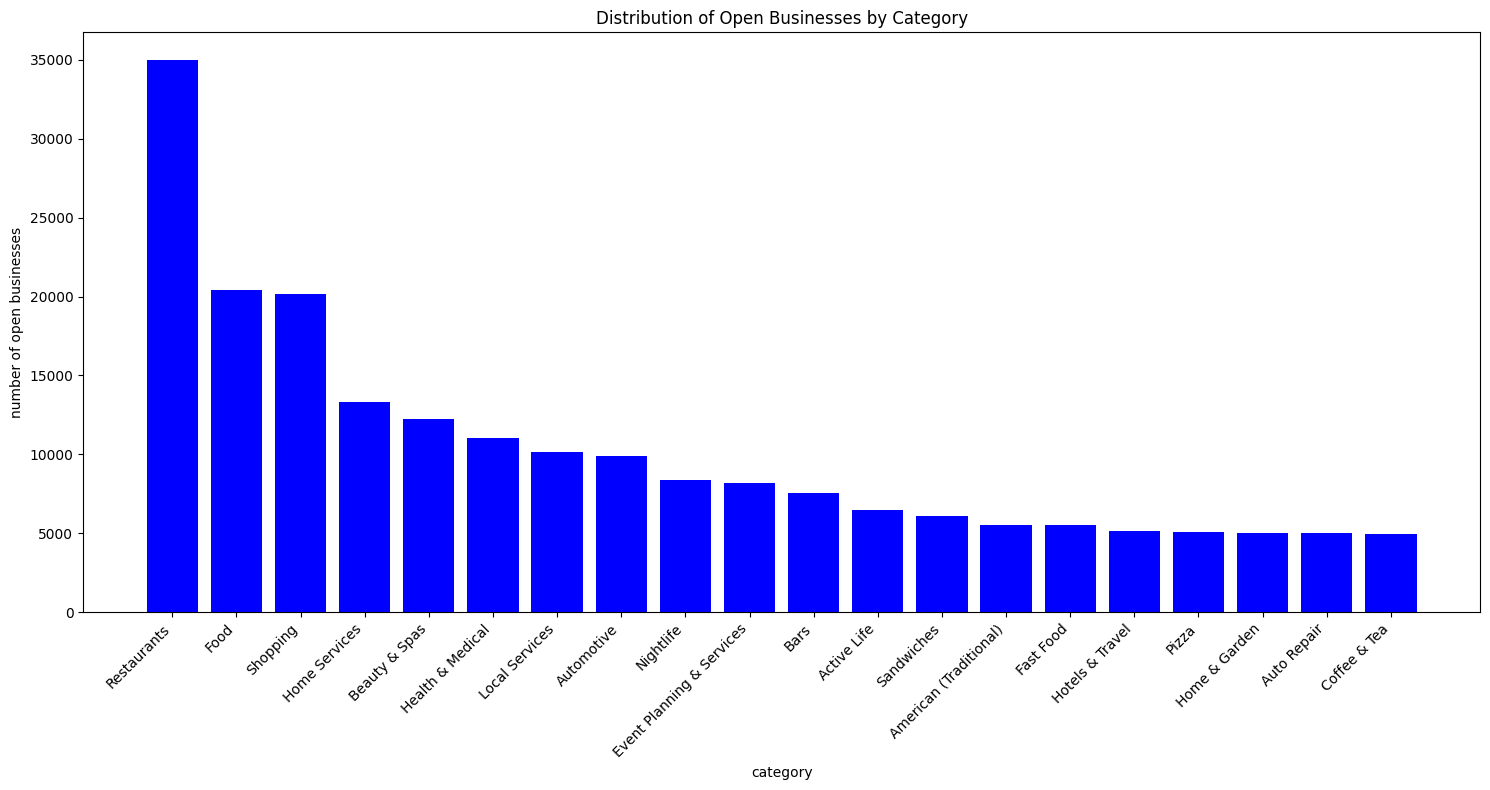

In [57]:

#limiting to top 20 businesses
top_20_open_businesses_by_category = open_businesses_by_category.limit(20)

# To visualize we need to Convert to Pandas DataFrame
pandas_open_businesses = top_20_open_businesses_by_category.toPandas()

# # Stop Spark Session
# spark.stop()

# Visualization
plt.figure(figsize=(15, 8))
plt.bar(pandas_open_businesses['categories'], pandas_open_businesses['count'], color='blue')
plt.xlabel('category')
plt.ylabel('number of open businesses')
plt.title('Distribution of Open Businesses by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [83]:
# Join business data and reviews
# joined_df = business.join(review, "business_id", "inner")
city_review_counts = joined_df.groupBy("city").count().orderBy("count", ascending=False)
# To Display results
city_review_counts.show()

+----------------+------+
|            city| count|
+----------------+------+
|    Philadelphia|967552|
|     New Orleans|635364|
|           Tampa|454889|
|       Nashville|451571|
|          Tucson|404880|
|    Indianapolis|361489|
|            Reno|351573|
|   Santa Barbara|269630|
|     Saint Louis|253437|
|           Boise|105366|
|        Edmonton|101823|
|      Clearwater| 87442|
|Saint Petersburg| 78907|
|          Sparks| 73033|
|        Metairie| 64361|
|       St. Louis| 63451|
|        Franklin| 56783|
|  St. Petersburg| 54480|
|          Goleta| 45643|
|      Wilmington| 44814|
+----------------+------+
only showing top 20 rows



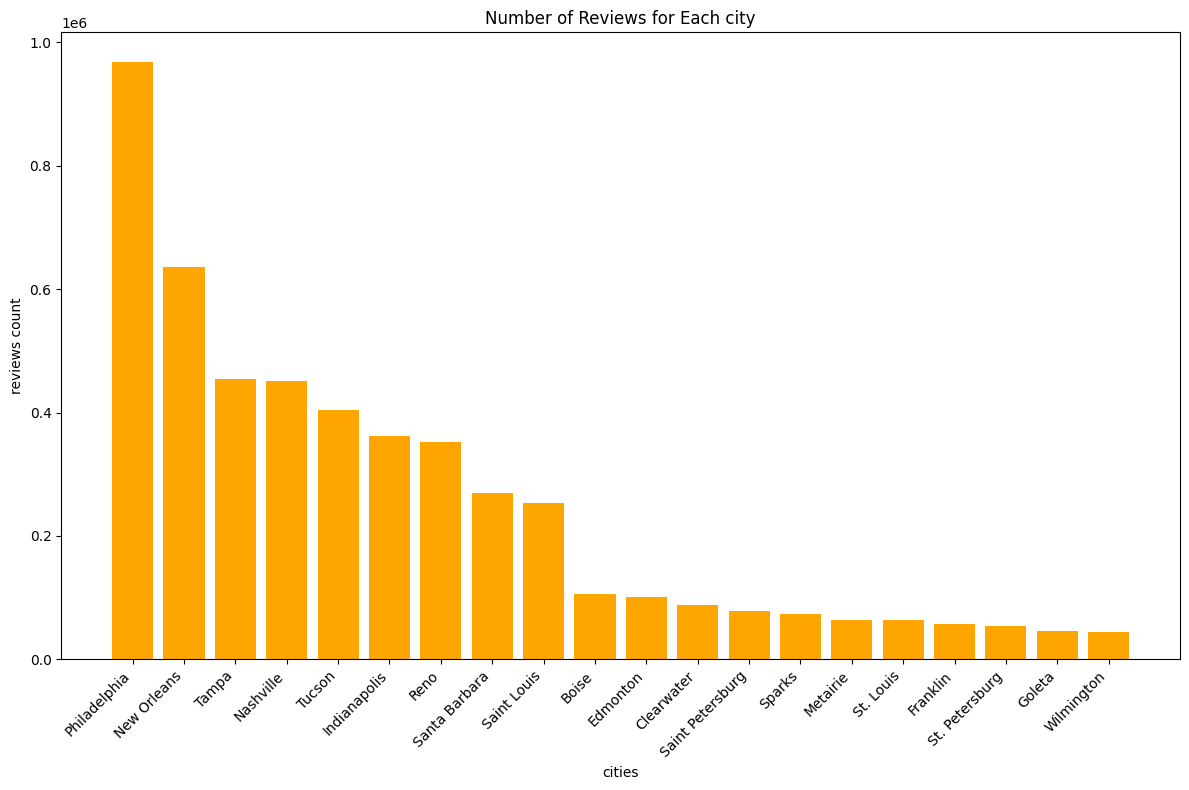

In [85]:

#limiting to top 40 businesses
top_40_cities_review_count = city_review_counts.limit(20)
#converting to pandas
pandas_city_review_counts = top_40_cities_review_count.toPandas()
# Visualization for the review count for top 40 categories 
plt.figure(figsize=(12, 8))
plt.bar(pandas_city_review_counts['city'], pandas_city_review_counts['count'], color='orange')
plt.xlabel('cities')
plt.ylabel('reviews count')
plt.title('Number of Reviews for Each city')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

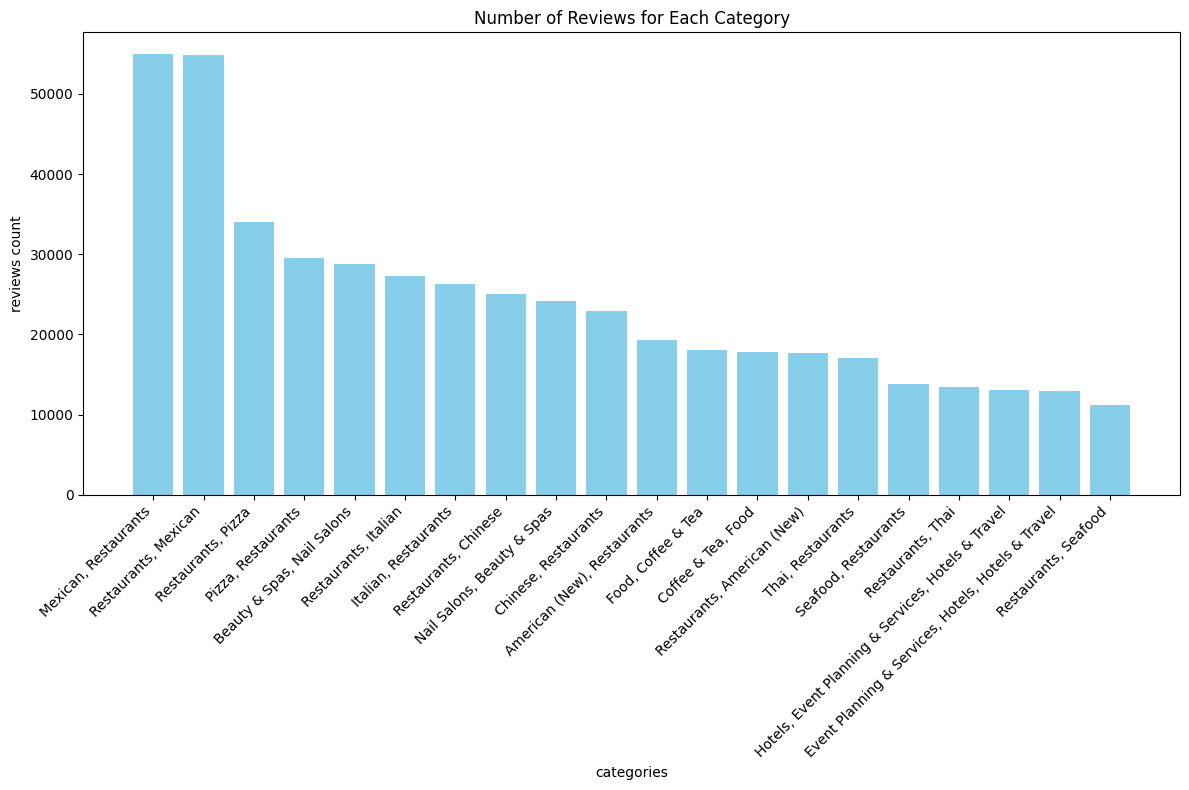

In [89]:


#limiting to top 40 businesses
top_40_open_businesses_by_category = category_review_counts.limit(20)
#converting to pandas
pandas_category_reviews = top_40_open_businesses_by_category.toPandas()
# Visualization for the review count for top 40 categories 
plt.figure(figsize=(12, 8))
plt.bar(pandas_category_reviews['categories'], pandas_category_reviews['count'], color='skyblue')
plt.xlabel('categories')
plt.ylabel('reviews count')
plt.title('Number of Reviews for Each Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [76]:
from pyspark.sql.functions import split, explode, col, array_contains

# Split categories string into an array
business_df = business.withColumn("categories", split("categories", ", "))

# DataFrames for restaurants and food businesses
restaurants_df = business_df.filter(array_contains(col("categories"), "Restaurants"))
food_businesses_df = business_df.filter(array_contains(col("categories"), "Food"))

In [63]:
# restaurants by city
top_cities_restaurant_business = restaurants_df.groupBy("city").count().orderBy("count", ascending=False).limit(10)

#  food businesses by city
top_citiesfood_business = food_businesses_df.groupBy("city").count().orderBy("count", ascending=False).limit(10)


In [65]:
print("Top 10 cities with the most restaurants:")
top_cities_restaurant_business.show()

print("Top 10 cities with the most food businesses:")
top_citiesfood_business.show()

Top 10 cities with the most restaurants:
+------------+-----+
|        city|count|
+------------+-----+
|Philadelphia| 5852|
|       Tampa| 2960|
|Indianapolis| 2862|
|   Nashville| 2502|
|      Tucson| 2466|
| New Orleans| 2259|
|    Edmonton| 2166|
| Saint Louis| 1790|
|        Reno| 1286|
|       Boise|  847|
+------------+-----+

Top 10 cities with the most food businesses:
+-------------+-----+
|         city|count|
+-------------+-----+
| Philadelphia| 3105|
|        Tampa| 1720|
|       Tucson| 1411|
| Indianapolis| 1372|
|    Nashville| 1314|
|  New Orleans| 1264|
|     Edmonton| 1085|
|         Reno|  855|
|  Saint Louis|  751|
|Santa Barbara|  571|
+-------------+-----+



In [73]:
# Convert to Pandas DataFrames for visualization (if not already done)
top_cities_restaurant_business_pd = top_cities_restaurant_business.toPandas()
top_cities_food_business_pd = top_citiesfood_business.toPandas()

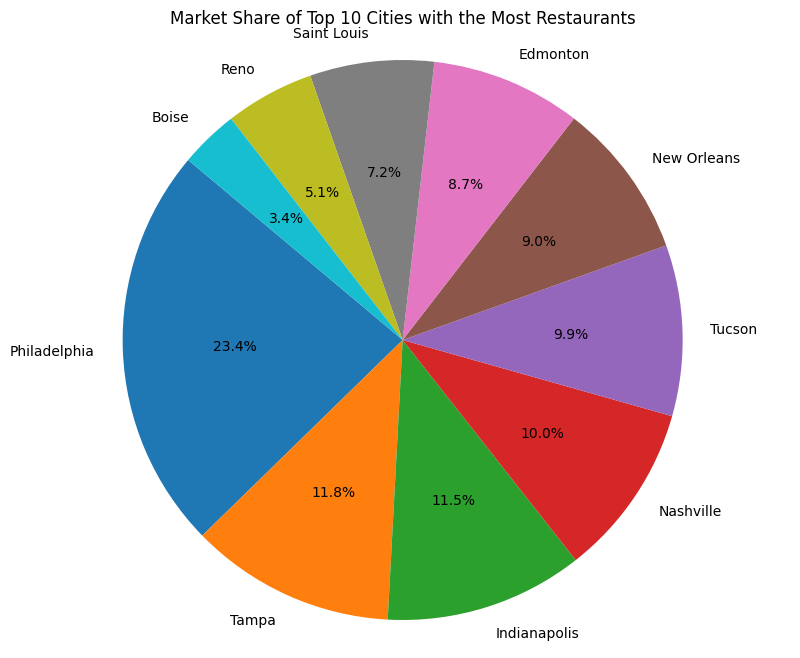

In [72]:
# Visualization for top 10 cities with the most restaurants
plt.figure(figsize=(10, 8))
plt.pie(top_cities_restaurant_business_pd['count'], labels=top_cities_restaurant_business_pd['city'], autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Top 10 Cities with the Most Restaurants')
plt.axis('equal')  # Ensure pie is drawn as a circle.
plt.show()

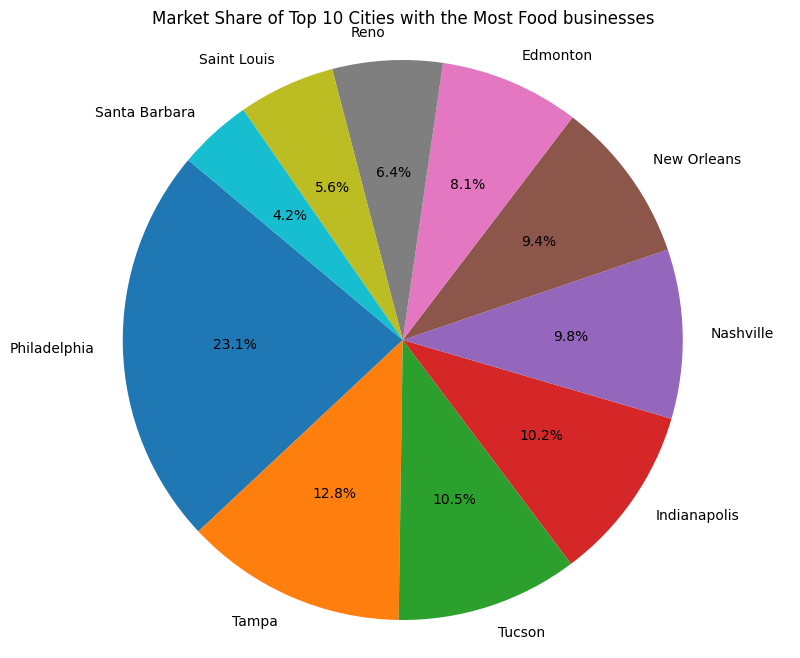

In [90]:
# Visualization for top 10 cities with the most restaurants
plt.figure(figsize=(10, 8))
plt.pie(top_cities_food_business_pd['count'], labels=top_cities_food_business_pd['city'], autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Top 10 Cities with the Most Food businesses')
plt.axis('equal')  # Ensure pie is drawn as a circle.
plt.show()

In [78]:
# Prepare and filter business data for restaurants
business_df = business.withColumn("categories", split("categories", ", "))
restaurants_df = business_df.filter(array_contains(col("categories"), "Restaurants"))

# Group by state and count the number of restaurants
restaurant_distribution = restaurants_df.groupBy("state").count().orderBy("count", ascending=False)

# Display results
print("Distribution of restaurants by state:")
restaurant_distribution.show()

# Prepare and filter business data for foods
business_df = business.withColumn("categories", split("categories", ", "))
food_business_df = business_df.filter(array_contains(col("categories"), "Food"))

# Group by state and count the number of restaurants
food_distribution = food_business_df.groupBy("state").count().orderBy("count", ascending=False)

# Display results
print("Distribution of restaurants by state:")
food_distribution.show()



Distribution of restaurants by state:
+-----+-----+
|state|count|
+-----+-----+
|   PA|12641|
|   FL| 8731|
|   TN| 4352|
|   MO| 4247|
|   IN| 4150|
|   LA| 3640|
|   NJ| 3341|
|   AZ| 2671|
|   AB| 2410|
|   NV| 1673|
|   ID| 1302|
|   CA| 1161|
|   IL|  983|
|   DE|  961|
|   NC|    1|
|   CO|    1|
|   HI|    1|
|   MT|    1|
|  XMS|    1|
+-----+-----+

Distribution of restaurants by state:
+-----+-----+
|state|count|
+-----+-----+
|   PA| 6637|
|   FL| 4784|
|   TN| 2194|
|   IN| 2113|
|   MO| 2023|
|   LA| 1995|
|   NJ| 1717|
|   AZ| 1520|
|   AB| 1208|
|   NV| 1101|
|   CA|  835|
|   ID|  829|
|   DE|  417|
|   IL|  405|
|   NC|    1|
|   MT|    1|
|  XMS|    1|
+-----+-----+



In [91]:
# # Convert to Pandas for visualization
# restaurant_state_counts_pd = restaurant_distribution.toPandas()
# food_state_counts_pd = food_distribution.toPandas()

# from wordcloud import WordCloud

# # Generate Word Clouds
# def generate_word_cloud(data, title):
#     wordcloud = WordCloud(width=200, height=100, background_color='white').generate_from_frequencies(dict(zip(data['state'], data['count'])))
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(title)
#     plt.axis('off')
#     plt.show()

# generate_word_cloud(restaurant_state_counts_pd, 'Word Cloud for Restaurants by State')
# generate_word_cloud(food_state_counts_pd, 'Word Cloud for Food Businesses by State')

In [103]:
from pyspark.sql.functions import to_date, year, month, avg, count

# 'date' is in a format like 'YYYY-MM-DD HH:MM:SS' and needs to be cast to date type
review = review.withColumn("date", to_date("date", "yyyy-MM-dd HH:mm:ss"))
review = review.withColumn("year", year("date"))
review = review.withColumn("month", month("date"))

# Print the schema to check if 'year' and 'month' columns have been added
review.printSchema()

# Show a few rows to confirm 'year' and 'month' columns exist and are populated correctly
review.select("date", "year", "month").show(5)


root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: date (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)

+----------+----+-----+
|      date|year|month|
+----------+----+-----+
|2018-07-07|2018|    7|
|2012-01-03|2012|    1|
|2014-02-05|2014|    2|
|2015-01-04|2015|    1|
|2017-01-14|2017|    1|
+----------+----+-----+
only showing top 5 rows



In [107]:
# Group by year and month, then count reviews and calculate average rating
monthly_reviews = review.groupBy("year", "month").agg(
    count("review_id").alias("num_reviews"),
    avg("stars").alias("avg_rating")
)
monthly_reviews_sorted = monthly_reviews.orderBy("year", "month")

# Show the results
monthly_reviews_sorted.show()

# most recent years and months, can sort in descending order
monthly_reviews_sorted_desc = monthly_reviews.orderBy(col("year").desc(), col("month").desc())

# Show the top 20 rows, which should now correspond to the latest years
monthly_reviews_sorted_.show(20)


+----+-----+-----------+------------------+
|year|month|num_reviews|        avg_rating|
+----+-----+-----------+------------------+
|2005|    2|          3| 4.333333333333333|
|2005|    3|         74|3.6486486486486487|
|2005|    4|         26| 4.153846153846154|
|2005|    5|        108| 4.083333333333333|
|2005|    6|         38| 4.026315789473684|
|2005|    7|        259| 3.671814671814672|
|2005|    8|         66| 4.166666666666667|
|2005|    9|         69|3.8840579710144927|
|2005|   10|         39| 4.205128205128205|
|2005|   11|         70| 3.842857142857143|
|2005|   12|        102| 4.107843137254902|
|2006|    1|        221| 3.986425339366516|
|2006|    2|        185| 4.129729729729729|
|2006|    3|        191| 4.052356020942408|
|2006|    4|        196|3.9183673469387754|
|2006|    5|        224|3.9642857142857144|
|2006|    6|        180|3.9944444444444445|
|2006|    7|        389| 3.966580976863753|
|2006|    8|        492| 3.975609756097561|
|2006|    9|        461| 4.03253

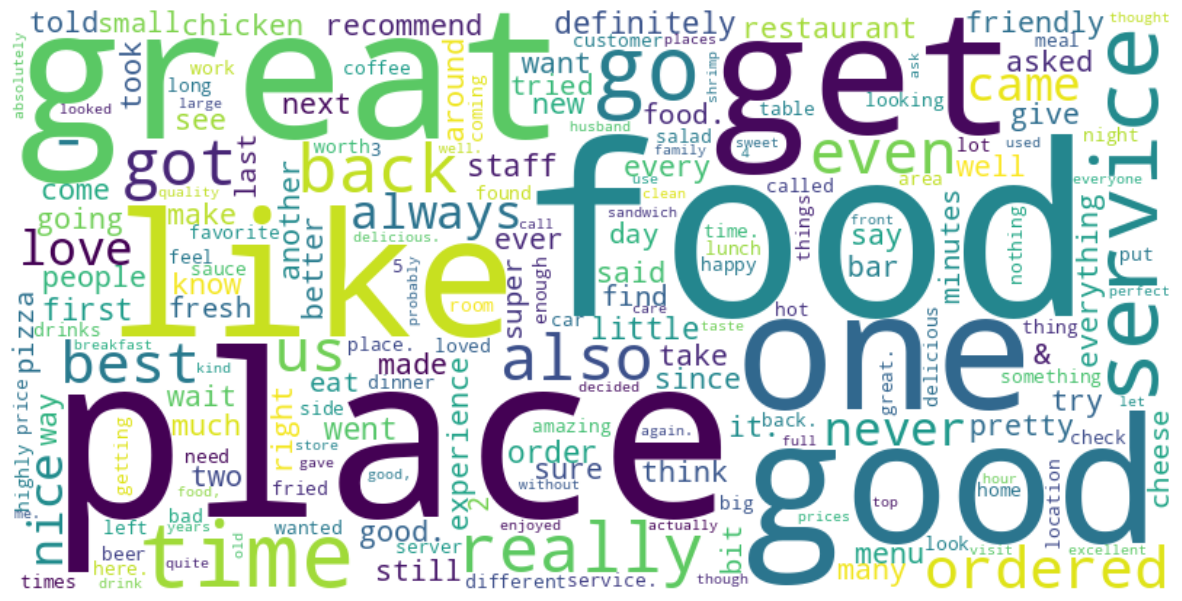

In [108]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from wordcloud import WordCloud

# Assuming 'review_df' is your DataFrame containing the review text column named 'text'
tokenizer = Tokenizer(inputCol="text", outputCol="words")
review_df = tokenizer.transform(review_df)

remover = StopWordsRemover(inputCol="words", outputCol="filtered")
review_df = remover.transform(review_df)

# Flatten the words and count them
word_counts = review_df.select("filtered").rdd.flatMap(lambda x: x[0]).countByValue()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the generated word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



### Post Data Processing EDA Analysis

In [29]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark import SparkConf

# Initialize SparkContext
sc = SparkContext.getOrCreate()

In [30]:
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Read JSON Files") \
    .getOrCreate()

# Read the JSON files
spark.read.option("multiline", "true").json("yelp_academic_dataset_business.json")
business = spark.read.json("yelp_academic_dataset_business.json")
review = spark.read.json("yelp_academic_dataset_review.json")
tip = spark.read.json("yelp_academic_dataset_tip.json")
checkin = spark.read.json("yelp_academic_dataset_checkin.json")

In [31]:
# Reading schema of all jsons
print("Schema of Business:")
business.printSchema()
print("First few rows of Business:")
business.show(5)
print(business.count())

tem = business.select("business_id") .distinct()
print(tem.count())



Schema of Business:
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |--

In [32]:
print("Schema of Review:")
review.printSchema()

print("First few rows of Review:")
review.show(5)
print(review.count())

Schema of Review:
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

First few rows of Review:
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a 

In [33]:
print("Schema of tip:")
review.printSchema()

print("First few rows of tip:")
review.show(5)
print(tip.count())

Schema of tip:
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

First few rows of tip:
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ..

In [34]:
print("Schema of checkin:")
review.printSchema()

print("First few rows of checkin:")
review.show(5)
print(checkin.count())

Schema of checkin:
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

First few rows of checkin:
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken 

In [35]:
# keeping only unique business id's and necessary columns and add index for easy access
from pyspark.sql.functions import col, collect_list

# Step 1: Copy the unique list of business ids in a 'temp' variable
temp = business.select("business_id").distinct()
#temp = business.groupBy("business_id").agg(collect_list("business_id")).collect()


print(temp.count())

150346


In [36]:
# Step 2: Create a new DataFrame 'review1' having business ids in temp and keep only relevant columns
review1 = review.join(temp, on="business_id", how="inner").select("business_id", "stars", "text")
review1
print(review1.count())

6990280


In [37]:
from pyspark.sql import functions as F

In [38]:
# Step 3: Create a new DataFrame 'review2' with index resetting (for future operations on this dataset)
review2 = review1.withColumn("index", F.monotonically_increasing_id())

# Display the first few rows of the DataFrame
review2.show()
print(review2.count())

+--------------------+-----+--------------------+-----+
|         business_id|stars|                text|index|
+--------------------+-----+--------------------+-----+
|XQfwVwDr-v0ZS3_Cb...|  3.0|If you decide to ...|    0|
|7ATYjTIgM3jUlt4UM...|  5.0|I've taken a lot ...|    1|
|YjUWPpI6HXG530lwP...|  3.0|Family diner. Had...|    2|
|kxX2SOes4o-D3ZQBk...|  5.0|Wow!  Yummy, diff...|    3|
|e4Vwtrqf-wpJfwesg...|  4.0|Cute interior and...|    4|
|04UD14gamNjLY0IDY...|  1.0|I am a long term ...|    5|
|gmjsEdUsKpj9Xxu6p...|  5.0|Loved this tour! ...|    6|
|LHSTtnW3YHCeUkRDG...|  5.0|Amazingly amazing...|    7|
|B5XSoSG3SfvQGtKEG...|  3.0|This easter inste...|    8|
|gebiRewfieSdtt17P...|  3.0|Had a party of 6 ...|    9|
|uMvVYRgGNXf5boolA...|  5.0|My experience wit...|   10|
|EQ-TZ2eeD_E0BHuvo...|  4.0|Locals recommende...|   11|
|lj-E32x9_FA7GmUrB...|  4.0|Love going here f...|   12|
|RZtGWDLCAtuipwaZ-...|  4.0|Good food--loved ...|   13|
|otQS34_MymijPTdNB...|  4.0|The bun makes the...

In [39]:
# Stop SparkSession
#spark.stop()

In [40]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [41]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [42]:
# analysing sentiment in review
analyzer = SentimentIntensityAnalyzer()


In [43]:
def compute_vader_sentiment_score(text):
    # Compute sentiment scores
    sentiment = analyzer.polarity_scores(text)
    # Return compound score (overall sentiment)
    return sentiment['compound']


In [44]:
compute_vader_sentiment_udf = udf(compute_vader_sentiment_score, FloatType())


In [45]:
df = review2.withColumn("sentiment_score", compute_vader_sentiment_udf("text"))
df.head()

Row(business_id='XQfwVwDr-v0ZS3_CbbE5Xw', stars=3.0, text="If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.", index=0, sentiment_score=0.8597000241279602)

In [46]:
# Apply the UDF to create a new column with sentiment polarity
from pyspark.sql.functions import when

# Define a function to categorize sentiment scores into positive, negative, or neutral
def categorize_sentiment(score):
    if score > 0.05:
        return 1
    elif score < -0.05:
        return 0
    else:
        return 2

# Register the function as a UDF
categorize_sentiment_udf = udf(categorize_sentiment)
df_rev = df.withColumn("sentiment_polarity", categorize_sentiment_udf("sentiment_score"))

# Show the DataFrame with the new 'sentiment_polarity' column
review2=df_rev
review2.show()
print(review2.count())

+--------------------+-----+--------------------+-----+---------------+------------------+
|         business_id|stars|                text|index|sentiment_score|sentiment_polarity|
+--------------------+-----+--------------------+-----+---------------+------------------+
|XQfwVwDr-v0ZS3_Cb...|  3.0|If you decide to ...|    0|         0.8597|                 1|
|7ATYjTIgM3jUlt4UM...|  5.0|I've taken a lot ...|    1|         0.9858|                 1|
|YjUWPpI6HXG530lwP...|  3.0|Family diner. Had...|    2|         0.9201|                 1|
|kxX2SOes4o-D3ZQBk...|  5.0|Wow!  Yummy, diff...|    3|         0.9588|                 1|
|e4Vwtrqf-wpJfwesg...|  4.0|Cute interior and...|    4|         0.9815|                 1|
|04UD14gamNjLY0IDY...|  1.0|I am a long term ...|    5|         0.7117|                 1|
|gmjsEdUsKpj9Xxu6p...|  5.0|Loved this tour! ...|    6|         0.9549|                 1|
|LHSTtnW3YHCeUkRDG...|  5.0|Amazingly amazing...|    7|         0.9706|                 1|

In [47]:
from pyspark.sql.functions import col, lower, contains, rand
from pyspark.sql import Window
print(business.count())

# Action 1: Drop businesses which are not open (is_open == 0)
business = business.filter(col("is_open") == 1)
print(business.count())

# Action 2: Drop businesses which are not in restaurant business (categories do not contain the keyword "food")
business = business.filter(
    lower(col("categories")).contains("food") | 
    lower(col("categories")).contains("restaurants")
)
print(business.count())

# Action 3: Drop businesses which have any missing values (remember there were 5 columns with missing values)
business = business.dropna()
print(business.count())

# Action 4: Create a random stratified sample of restaurants with equal weightage to 'stars' column (distinct count = 9)
window = Window.partitionBy("stars").orderBy(rand())  # Order by a random number
business = business.withColumn("sample", F.row_number().over(window)).filter(col("sample") <= 20).drop("sample")
print(business.count())

# Action 5: Drop unnecessary columns (neighborhood, address, postal_code, is_open, categories) and reindex
business = business.select("business_id", "name", "stars", "review_count", "city", "state")
print(business.count())

# Show the resulting DataFrame
business.show()
print(business.count())


150346
119698
44582
39448
180
180
+--------------------+------------------+-----+------------+---------------+-----+
|         business_id|              name|stars|review_count|           city|state|
+--------------------+------------------+-----+------------+---------------+-----+
|LuhrYmlg-L9rYlju_...|       Burger King|  1.0|           9|   Ashland City|   TN|
|l2CT52WJvmRicrkKa...|      CVS Pharmacy|  1.0|           6|        Swansea|   IL|
|lTE4kAGdbUYe85yhM...|          Checkers|  1.0|          11|      La Vergne|   TN|
|i32_0bfMEpQxV_q55...|        McDonald's|  1.0|          18|          Largo|   FL|
|iHMCGmeC5w1J_i_zP...|      CVS Pharmacy|  1.0|           6|          Tampa|   FL|
|zr7MF0D3_a5rXnI5K...|Indy Party Rentals|  1.0|          24|   Indianapolis|   IN|
|pokplllvDH7X9-n_3...|        McDonald's|  1.0|          33|     Shrewsbury|   MO|
|kK6rYQcyxW_FnuVh8...|        McDonald's|  1.0|          30|   Philadelphia|   PA|
|4LrN3iUtjMXUxilzE...|        McDonald's|  1.0|      

In [48]:
from pyspark.sql.functions import col

def downsize_checkin(checkin, business):
    # Step 1: Copy the unique list of business ids in a 'temp' variable
    temp = business.select("business_id") .distinct()
    print(temp.count())
    
    # Step 2: Create a new dataframe checkin1 having business ids in temp
    checkin1 = checkin.join(temp, "business_id", "inner")
    temp1=checkin.select("business_id").distinct()
    print(temp1.count())
    print (checkin.count())
    print (checkin1.count())


    # Step 3: Create a new dataframe checkin2 with aggregation (Business Id - Total count of checkins)
    checkin2 = checkin.groupBy("business_id").count().withColumnRenamed("count", "total_checkins")

    
    
    return checkin2

# Call the function with your checkin and business DataFrames
checkin2 = downsize_checkin(checkin, business)

# Show the resulting DataFrame
checkin2.show()






180
131930
131930
177
+--------------------+--------------+
|         business_id|total_checkins|
+--------------------+--------------+
|-0iIxySkp97WNlwK6...|             1|
|-1dARtemb2Gy7Xlft...|             1|
|-BB9Xn-ak_23FxVEW...|             1|
|-JAwNIEJoDXmdE_8s...|             1|
|-UADx0eR5Huq6s1CP...|             1|
|-WUHfRZ7a5NQA4TyG...|             1|
|-WvUB8bDBNXuvTU9i...|             1|
|-ZzCVD9Ge7KCy4ffh...|             1|
|-ajaASaDA_77I6pK3...|             1|
|-dB0vYhiTeBDlayTz...|             1|
|-f5A6KKUu4jZN1qpt...|             1|
|-fjIX9bvBKwXjQWfd...|             1|
|-mxgEmVaB0Izs2-qa...|             1|
|-nEqIKUP2ykB7rSIh...|             1|
|-rKaikuKBl1BwDPNJ...|             1|
|04Itzpsew47i9UJ3u...|             1|
|05qVGl0KbrzU9gbTp...|             1|
|07uojIeVeauFxa7yO...|             1|
|0Y8xQvpbmO02SsFZt...|             1|
|0jgz7W-ytCK-LmN84...|             1|
+--------------------+--------------+
only showing top 20 rows



In [49]:
# merge checkin and business

def merge_business_checkin(checkin2, business):
    # Join the DataFrames on the "business_id" column using a left join
    business_checkin = business.join(checkin2, "business_id", "left")
    print(business_checkin.count())
    # Fill the missing values in the "total_checkins" column with 0
    business_checkin = business_checkin.fillna(0, subset=["total_checkins"])
    
    return business_checkin

# Call the function with your checkin2 and business1 DataFrames
business_checkin = merge_business_checkin(checkin2, business)

# Show the resulting DataFrame
business_checkin.show()




180
+--------------------+------------------+-----+------------+---------------+-----+--------------+
|         business_id|              name|stars|review_count|           city|state|total_checkins|
+--------------------+------------------+-----+------------+---------------+-----+--------------+
|l2CT52WJvmRicrkKa...|      CVS Pharmacy|  1.0|           6|        Swansea|   IL|             1|
|iHMCGmeC5w1J_i_zP...|      CVS Pharmacy|  1.0|           6|          Tampa|   FL|             1|
|kK6rYQcyxW_FnuVh8...|        McDonald's|  1.0|          30|   Philadelphia|   PA|             1|
|J295hhgR7i7DEyN0u...|         Taco Bell|  1.5|          10|    North Wales|   PA|             1|
|0oNiXwMtqXIrI0QEJ...| The Playhouse 822|  1.0|          10|   Philadelphia|   PA|             1|
|pokplllvDH7X9-n_3...|        McDonald's|  1.0|          33|     Shrewsbury|   MO|             1|
|j1CCLERiAMYSvCPhD...|           Dunkin'|  1.0|          17|     Clearwater|   FL|             1|
|wPwxfwrSNMmqxEH

In [50]:
from pyspark.sql.functions import sum as sql_sum, col

def calculate_net_positive_sentiment(review2, business_checkin):
    # Aggregate the polarity values by business_id
    polarity_sum = review2.groupby('business_id').agg(sql_sum('sentiment_polarity').alias('sum_polarity'))
    
    # Join with the business_checkin DataFrame to get total_count_of_reviews
    net_positive_sentiment = polarity_sum.join(business_checkin.select('business_id', 'review_count'), 
                                               on='business_id', how='inner')
    
    # Calculate net positive sentiment score
    net_positive_sentiment = net_positive_sentiment.withColumn('net_positive_sentiment_score',
                                                               col('sum_polarity') / col('review_count'))
    
    # Select only the required columns
    net_positive_sentiment = net_positive_sentiment.select('business_id', 'net_positive_sentiment_score')
    
    return net_positive_sentiment

# Call the function with review2 and business_checkin DataFrames
net_positive_sentiment = calculate_net_positive_sentiment(review2, business_checkin)

# Show the resulting DataFrame
net_positive_sentiment.show()


+--------------------+----------------------------+
|         business_id|net_positive_sentiment_score|
+--------------------+----------------------------+
|w4FJ7n3VmCjLqsdyh...|          0.5714285714285714|
|pIcBWVREJaIhAo90Y...|                         1.0|
|IHCSJHLyz2MgXpJAV...|          1.0188679245283019|
|lok1BFflfV17T04k-...|                         1.0|
|Jm6ROc4Q4y1R4HXzk...|          0.7605633802816901|
|nzmOsV_uQ8jOrEurv...|                         0.9|
|xm_5HMdQ2esc2Evrw...|          0.3333333333333333|
|l2CT52WJvmRicrkKa...|          0.6666666666666666|
|9KOX3ODn4YrKm5-SC...|          0.2222222222222222|
|7k-tfmFwqgPYPMIGi...|                         1.0|
|WbcLJqj84WrGRZ1FW...|          0.8214285714285714|
|Wy8Hswf2cLQGRZN6a...|          0.3953488372093023|
|3UK4mtRYfn0efzFKb...|                         0.7|
|wMyHVb54Ne9SNasa4...|          0.9893238434163701|
|sSeXx0d2rrgRgof__...|                         1.0|
|WWBzJvqnM2U9FxL6X...|         0.45454545454545453|
|xzDBoVc1QfP

In [51]:
def merge_business_checkin_review(business_checkin, review2):
    
    
    
    # Merge DataFrames
    business_checkin_review = business_checkin.join(review2, on="business_id", how="inner")
    print(business_checkin_review.count())
    # Handle missing values
    business_checkin_review = review2.fillna(0)
    
    return business_checkin_review

# Example usage
business_checkin_review = merge_business_checkin_review(business_checkin, review2)
business_checkin_review.show()

10354
+--------------------+-----+--------------------+-----+---------------+------------------+
|         business_id|stars|                text|index|sentiment_score|sentiment_polarity|
+--------------------+-----+--------------------+-----+---------------+------------------+
|XQfwVwDr-v0ZS3_Cb...|  3.0|If you decide to ...|    0|         0.8597|                 1|
|7ATYjTIgM3jUlt4UM...|  5.0|I've taken a lot ...|    1|         0.9858|                 1|
|YjUWPpI6HXG530lwP...|  3.0|Family diner. Had...|    2|         0.9201|                 1|
|kxX2SOes4o-D3ZQBk...|  5.0|Wow!  Yummy, diff...|    3|         0.9588|                 1|
|e4Vwtrqf-wpJfwesg...|  4.0|Cute interior and...|    4|         0.9815|                 1|
|04UD14gamNjLY0IDY...|  1.0|I am a long term ...|    5|         0.7117|                 1|
|gmjsEdUsKpj9Xxu6p...|  5.0|Loved this tour! ...|    6|         0.9549|                 1|
|LHSTtnW3YHCeUkRDG...|  5.0|Amazingly amazing...|    7|         0.9706|             

In [52]:
# Joining net_positive_sentiment with business_checkin on 'business_id'
merged_df = net_positive_sentiment.join(business_checkin_review, on='business_id', how='inner')

# Display the schema of the merged DataFrame to understand its structure
merged_df.printSchema()
merged_df.show()

root
 |-- business_id: string (nullable = true)
 |-- net_positive_sentiment_score: double (nullable = true)
 |-- stars: double (nullable = false)
 |-- text: string (nullable = true)
 |-- index: long (nullable = false)
 |-- sentiment_score: float (nullable = false)
 |-- sentiment_polarity: string (nullable = true)

+--------------------+----------------------------+-----+--------------------+------------+---------------+------------------+
|         business_id|net_positive_sentiment_score|stars|                text|       index|sentiment_score|sentiment_polarity|
+--------------------+----------------------------+-----+--------------------+------------+---------------+------------------+
|9KOX3ODn4YrKm5-SC...|          0.2222222222222222|  1.0|Terrible service....|292057792370|         0.4953|                 1|
|9KOX3ODn4YrKm5-SC...|          0.2222222222222222|  1.0|By far my worst D...|292057889897|        -0.3595|                 0|
|9KOX3ODn4YrKm5-SC...|          0.222222222222222

In [53]:
print(merged_df.count())

10354


In [ ]:
spark.stop()